In [113]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Digit_Recognizer_data/train.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['label']
X = df.drop('label', axis=1)

In [ ]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
X_normalized[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_normalized_2d = X_normalized.reshape(-1, 28, 28, 1)

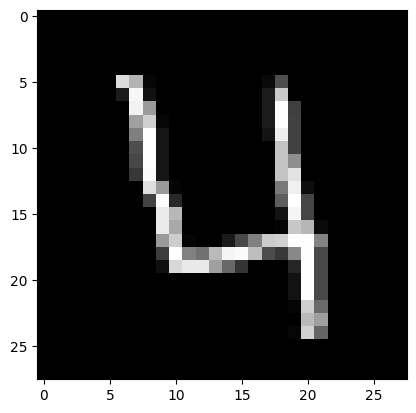

In [ ]:
plt.imshow(X_normalized_2d[3], cmap='gray')
plt.show()

In [ ]:
X_normalized_2d.shape

(42000, 28, 28, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_2d, y, test_size=0.2, random_state=42)
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of y_test is: ' + str(y_test.shape))

The shape of X_train is: (33600, 28, 28, 1)
The shape of X_test is: (8400, 28, 28, 1)
The shape of y_train is: (33600,)
The shape of y_test is: (8400,)


In [114]:
tf.random.set_seed(1234) # for consistent results
#tf.keras.models.Sequential
model = Sequential(
    [
        tf.keras.Input(shape=(28,28,1)),
        Conv2D(filters=8, kernel_size=5, activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters=16, kernel_size=5, activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dropout(0.2),
        Dense(units=10, activation='sigmoid')
    ], name = "digit_recognizer"
)

In [115]:
model.summary()

Model: "digit_recognizer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,226 (176.66 KB)

 Trainable params: 45,226 (176.66 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    X_train,y_train,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7912 - loss: 0.6359
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9665 - loss: 0.1085
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9781 - loss: 0.0743
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9837 - loss: 0.0548
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9858 - loss: 0.0463
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9895 - loss: 0.0360
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9904 - loss: 0.0312
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9921 - loss: 0.0260
Epoch 9/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9936 - loss: 0.0217
Epoch 10/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9937 - loss: 0.0213
Epoch 11/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9937 - loss: 0.0181
Epoch 12/20
1050/10

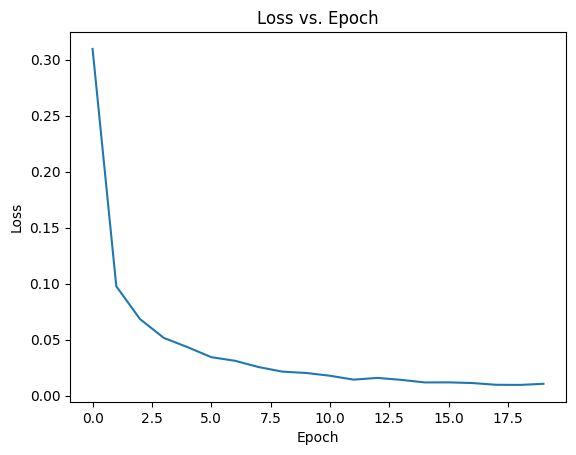

In [117]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()


In [118]:
# prompt: predict using first row of X

# Get the first row of X
first_row = X_normalized[[3]].reshape(-1, 28, 28, 1)

# Predict the label for the first row
prediction = model.predict(first_row)

# Print the prediction
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[2.4953708e-09 3.7163048e-04 1.0791008e-01 1.0612641e-09 9.9999952e-01
  1.9097932e-09 2.1861237e-03 1.8441117e-03 7.5594430e-06 7.2578847e-01]]


In [119]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

 predicting a Two. Probability vector: 
[[0.07750135 0.07753015 0.08633244 0.07750135 0.2106704  0.07750135
  0.07767096 0.07764439 0.07750193 0.16014567]]
Total of predictions: 1.000
np.argmax(prediction_p): 4


In [120]:
predictions = model.predict(X_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [121]:
yhat = np.argmax(tf.nn.softmax(predictions), axis=1)
print(f"Total correct predictions: {(y_test == yhat).sum()}/{X_test.shape[0]}")

Total correct predictions: 8289/8400


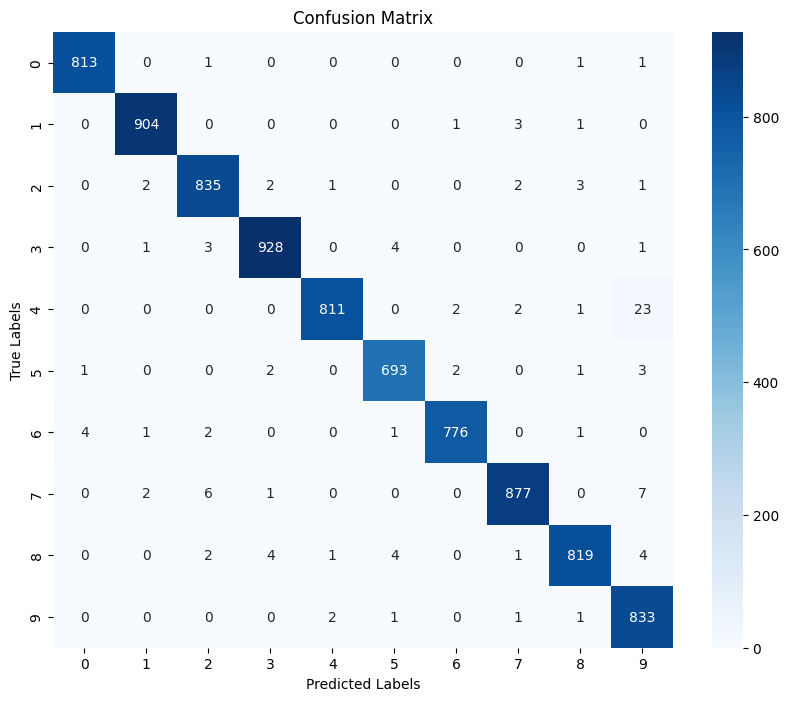

In [122]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
df_test = pd.read_csv('Digit_Recognizer_data/test.csv')

In [ ]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_set = df_test.to_numpy()

In [ ]:
test_set.shape

(28000, 784)

In [ ]:
test_set = test_set.reshape(-1, 28, 28, 1)

In [ ]:
test_set.shape

(28000, 28, 28, 1)

In [123]:
test_set_prediction = model.predict(test_set)
test_set_yhat = np.argmax(tf.nn.softmax(test_set_prediction), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [ ]:
test_set_yhat[:20]

array([1, 0, 4, 0, 1, 7, 0, 3, 0, 3, 3, 2, 4, 0, 4, 3, 3, 1, 4, 0])

In [ ]:
test_set_yhat[:20]

array([0, 0, 4, 0, 1, 7, 0, 1, 0, 3, 3, 4, 3, 0, 4, 1, 1, 1, 4, 0])

In [124]:
test_set_yhat[:20]

array([2, 0, 9, 0, 3, 4, 0, 3, 0, 3, 5, 2, 4, 0, 4, 3, 3, 1, 9, 0])

In [125]:
# prompt: create a excel named sample_submission.csv with first column as ImageId with ids ranging 1 to len of test_set_yhat  and second column as Lable as test_set_yhat

import pandas as pd

# Create a DataFrame with ImageId and Label columns
submission_df = pd.DataFrame({'ImageId': range(1, len(test_set_yhat) + 1), 'Label': test_set_yhat})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_3.csv', index=False)
